In [1]:
#importing required libraries
import pandas as pd

In [2]:
#loading our training datasets
#trainx contains the independent variables
#trainy contains the target variable(the number of cabs booked in an hour)
trainx=pd.read_csv("C:/Users/Administrator/Desktop/gramener/Case Study-Pre-Joining-Task/Dataset/train.csv")
trainy=pd.read_csv("C:/Users/Administrator/Desktop/gramener/Case Study-Pre-Joining-Task/Dataset/train_label.csv",header=None)
testx=pd.read_csv("C:/Users/Administrator/Desktop/gramener/Case Study-Pre-Joining-Task/Dataset/test.csv")
testy=pd.read_csv("C:/Users/Administrator/Desktop/gramener/Case Study-Pre-Joining-Task/Dataset/test.csv")

In [3]:
#printing first few records of our training set containing independent variables
trainx.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [4]:
#inputting the values of weather by their frequency
trainx["weather"]=trainx["weather"].map(trainx["weather"].value_counts())

In [5]:
#converting the frequency to labels, thus higher frequency will have higher precedence
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
trainx["weather"]=le.fit_transform(trainx["weather"])

In [6]:
#deriving date and time fields from our field datetime
ls1=trainx["datetime"].str.split(" ").str[0].str.strip()
ls2=trainx["datetime"].str.split(" ").str[1].str.strip()
trainx["date"]=pd.to_datetime(ls1)
trainx["time"]=ls2
trainx = trainx.drop("datetime",axis = 1)

In [7]:
#deriving month , year and weekday from date field
trainx["month"]=trainx["date"].dt.month
trainx["year"]=trainx["date"].dt.year
trainx["weekday"]=trainx["date"].dt.weekday_name

In [8]:
#dropping the date field
trainx=trainx.drop(columns="date")

In [9]:
#converting out time from hh:mm format to float
trainx["time"]=trainx["time"].str.split(":").str[0].str.strip().astype("float")

In [10]:
#appending the output variable i.e the number of bookings per hour to our dataset containing 
#independent variables
trainx["output"]=trainy

In [11]:
#inputting the values of holiday by their frequency
trainx["holiday"]=trainx["holiday"].map(trainx["holiday"].value_counts())

In [12]:
#converting the frequency to labels, thus higher frequency will have higher precedence
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
trainx["season"]=le.fit_transform(trainx["season"])

In [13]:
trainx.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time,month,year,weekday,output
0,2,8460,1,3,22.14,25.760,77,16.9979,19.0,5,2012,Wednesday,504
1,0,8460,1,3,28.70,33.335,79,19.0012,4.0,9,2012,Wednesday,5
2,1,8460,1,3,5.74,6.060,50,22.0028,9.0,1,2011,Thursday,139
3,3,8460,1,3,13.94,16.665,29,8.9981,16.0,11,2011,Friday,209
4,0,8460,1,3,30.34,33.335,51,19.0012,13.0,9,2011,Tuesday,184


In [14]:
#we see that atemp and temp show strong positve correlation, therefore we drop one of them.
#Here ,I am dropping temp
trainx["temp"].corr(trainx["atemp"])

0.9840346137836908

In [15]:
#here, we see that there are almost the same number cab bookings on all the week days.
#Thus weekday does not have any significance on the output variable
trainx.groupby(["weekday"])["output"].sum()

weekday
Friday       244122
Monday       238427
Saturday     253650
Sunday       227913
Thursday     242749
Tuesday      237400
Wednesday    236444
Name: output, dtype: int64

In [16]:
#dropping the columns temp and weekday
trainx=trainx.drop(columns=["temp","weekday"])

In [17]:
#replacing the values of each hour by the total count of the number of cabs booked.
#this count is stored in a new column time_new , and therefore we drop our old column time.
#we then convert this count to corresponding labels, so that higher count values get higher precedence.
df2=pd.DataFrame(trainx.groupby(["time"])["output"].sum())
df2=df2.reset_index()
dic2=dict(zip(df2["time"],df2["output"]))
trainx['time_new'] = trainx['time'].map(dic2)

trainx["time_new"]=le.fit_transform(trainx["time"])
trainx=trainx.drop(columns=["time"])

In [18]:
#we then drop our output variable
trainx=trainx.drop(columns=["output"])


In [19]:
trainx.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,month,year,time_new
0,2,8460,1,3,25.760,77,16.9979,5,2012,19
1,0,8460,1,3,33.335,79,19.0012,9,2012,4
2,1,8460,1,3,6.060,50,22.0028,1,2011,9
3,3,8460,1,3,16.665,29,8.9981,11,2011,16
4,0,8460,1,3,33.335,51,19.0012,9,2011,13


In [20]:
#!pip install seaborn

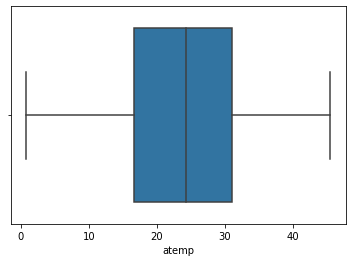

In [21]:
#checking for outliers in atemp.
import seaborn as sns
sns.boxplot(x=trainx["atemp"])

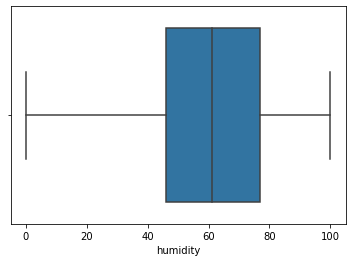

In [22]:
#checking for outliers in humidity
import seaborn as sns
sns.boxplot(x=trainx["humidity"])

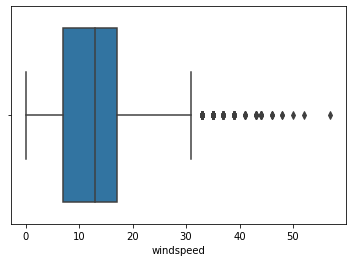

In [23]:
#checking for outliers in windspeed
import seaborn as sns
sns.boxplot(x=trainx["windspeed"])

In [24]:
#from the above boxplots,we see that humidity and atemp do not have outliers,but windspeed has.

In [25]:
#the maximum value of windspeed is 56.9969
trainx["windspeed"].describe()

count    8708.000000
mean       12.843891
std         8.190314
min         0.000000
25%         7.001500
50%        12.998000
75%        16.997900
max        56.996900
Name: windspeed, dtype: float64

In [26]:
#the value we are using for capping the outliers
upper=16.9979+1.5*(16.9979-7.0015)

In [27]:
#treating the outliers of windspeed using capping method

import numpy as np
trainx["windspeed"]=np.where((trainx["windspeed"]>upper),upper,trainx["windspeed"])

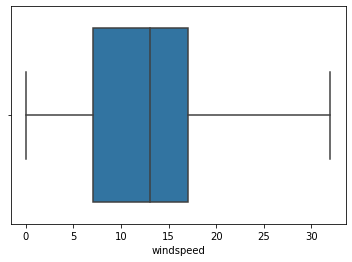

In [28]:
#checking if there are outliers
import seaborn as sns
sns.boxplot(x=trainx["windspeed"])

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
X=trainx
X=sc.fit_transform(trainx)
y=sc.fit_transform(trainy)
#y=trainy

In [30]:
testx=pd.read_csv("C:/Users/Administrator/Desktop/gramener/Case Study-Pre-Joining-Task/Dataset/test.csv")
testy=pd.read_csv("C:/Users/Administrator/Desktop/gramener/Case Study-Pre-Joining-Task/Dataset/test_label.csv",header=None)

In [31]:
#printing first few records of our training set containing independent variables
testx.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [32]:
#inputting the values of weather by their frequency
testx["weather"]=testx["weather"].map(testx["weather"].value_counts())

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
testx["weather"]=le.fit_transform(testx["weather"])

In [34]:
ls1=testx["datetime"].str.split(" ").str[0].str.strip()
ls2=testx["datetime"].str.split(" ").str[1].str.strip()
testx["date"]=pd.to_datetime(ls1)
testx["time"]=ls2
testx = testx.drop("datetime",axis = 1)

In [35]:
testx["month"]=testx["date"].dt.month
testx["year"]=testx["date"].dt.year
testx["weekday"]=testx["date"].dt.weekday_name

In [36]:
testx=testx.drop(columns="date")

In [37]:
testx["time"]=testx["time"].str.split(":").str[0].str.strip()

In [38]:
testx["time"]=testx["time"].astype("float")

In [39]:
testx["holiday"]=testx["holiday"].map(testx["holiday"].value_counts())

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
testx["season"]=le.fit_transform(testx["season"])

In [41]:
#############
testx=testx.drop(columns=["temp","weekday"])

In [42]:
testx["output"]=testy

In [43]:
df2=pd.DataFrame(testx.groupby(["time"])["output"].sum())
df2=df2.reset_index()
dic2=dict(zip(df2["time"],df2["output"]))
testx['time_new'] = testx['time'].map(dic2) 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
testx["time_new"]=le.fit_transform(testx["time"])
testx=testx.drop(columns=["time"])

In [44]:
#trainx["humidity"].corr(trainx["temp"])
testx=testx.drop(columns=["output"])


In [45]:
#priniting first few records of our test set
testx.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,month,year,time_new
0,2,2115,1,2,25.000,48,35.0008,5,2012,11
1,2,2115,0,2,27.275,64,7.0015,6,2012,7
2,1,2115,0,0,12.120,100,27.9993,3,2011,20
3,3,2115,1,1,28.790,83,0.0000,10,2011,11
4,2,2115,0,2,31.060,43,23.9994,6,2012,12


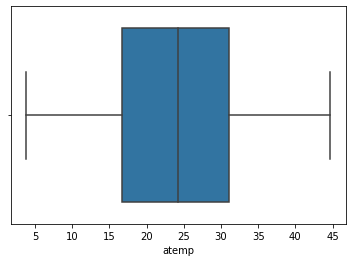

In [46]:
#checking for outliers in atemp.
import seaborn as sns
sns.boxplot(x=testx["atemp"])

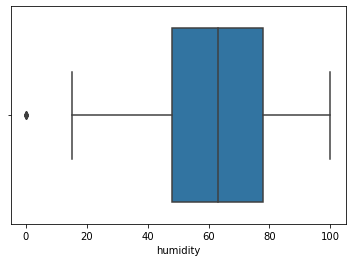

In [47]:
#checking for outliers in atemp.
import seaborn as sns
sns.boxplot(x=testx["humidity"])

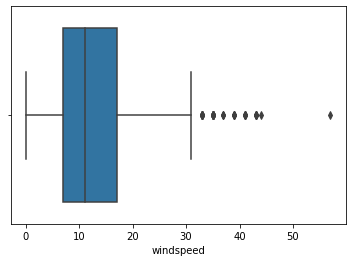

In [48]:
#checking for outliers in atemp.
import seaborn as sns
sns.boxplot(x=testx["windspeed"])

In [49]:
#from the above boxplot we see that there are outliers in humidity and windspeed columns

In [50]:
#value used for capping humidity column
lower_humidity=48-1.5*(78-48)

In [51]:
#treating the outliers of humidity using capping method
import numpy as np
testx["humidity"]=np.where((testx["humidity"]<lower_humidity),lower_humidity,testx["humidity"])

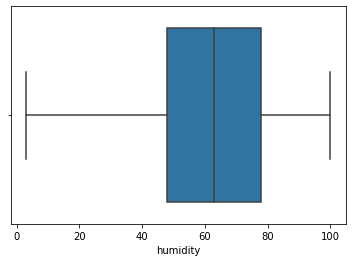

In [52]:
#checking if outliers are treated in humidity.
import seaborn as sns
sns.boxplot(x=testx["humidity"])

In [53]:
#the value we are using for capping the outliers
upper=16.9979+1.5*(16.9979-7.0015)
#treating the outliers of windspeed using capping method
import numpy as np
testx["windspeed"]=np.where((testx["windspeed"]>upper),upper,testx["windspeed"])

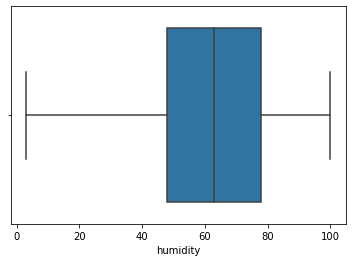

In [54]:
#checking if outliers are treated in .
import seaborn as sns
sns.boxplot(x=testx["humidity"])

In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()

x_test=sc.fit_transform(testx)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import math
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)
#lr=LinearRegression()
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
pred=rfr.predict(xtest)


score=r2_score(ytest,pred)
print("score=",score)
rmse=math.sqrt(mean_squared_error(ytest,pred))
print("rmse=",rmse)

C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


score= 0.9371694291791862
rmse= 0.2517244044922789


In [57]:
#evaluating model on the test set
rfr=RandomForestRegressor()
rfr.fit(X,y)
ypred=rfr.predict(x_test)
ypred=ypred.reshape(-1,1)
testy=sc.fit_transform(testy)
score=r2_score(testy,ypred)
print("score=",score)
rmse=math.sqrt(mean_squared_error(testy,ypred))
print("rmse=",rmse)

C:\Users\Administrator\.conda\envs\tf1\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


score= 0.9424286834687803
rmse= 0.23994023533209216


In [58]:
trainx

,season,holiday,workingday,weather,atemp,humidity,windspeed,month,year,time_new
0,2,8460,1,3,25.760,77,16.9979,5,2012,19
1,0,8460,1,3,33.335,79,19.0012,9,2012,4
2,1,8460,1,3,6.060,50,22.0028,1,2011,9
3,3,8460,1,3,16.665,29,8.9981,11,2011,16
4,0,8460,1,3,33.335,51,19.0012,9,2011,13
...,...,...,...,...,...,...,...,...,...,...
8703,1,248,0,3,6.820,54,6.0032,1,2012,6
8704,3,8460,1,2,20.455,87,0.0000,11,2011,1
8705,2,8460,1,2,27.275,56,8.9981,4,2011,3
8706,3,8460,1,2,13.635,61,16.9979,11,2012,1


In [59]:
ypred=sc.inverse_transform(ypred)